EXERCISE 1: HOG - HISTOGRAM OF ORIENTED GRADIENTS (OBJECT DETECTION)

In [1]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('meow4x.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

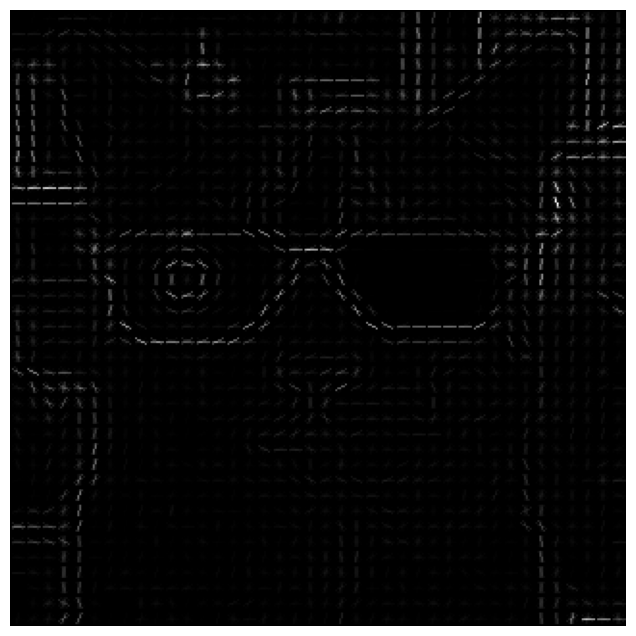

In [8]:
features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(hog_image, cmap='gray')
plt.show()

EXERCISE 2: YOLO - YOU ONLY LOOK ONCE (OBJECT DETECTION)

In [15]:
!pip install tensorflow
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install opencv-python-headless
!pip install opencv-python

In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [19]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2024-10-28 10:18:09--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  36.1MB/s    in 6.8s    

2024-10-28 10:18:16 (34.9 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2024-10-28 10:18:16--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s   

In [20]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [21]:
image = cv2.imread('meow4x.jpg')
height, width, channels = image.shape

In [23]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names

--2024-10-28 10:35:18--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2024-10-28 10:35:18 (24.3 MB/s) - ‘coco.names’ saved [625/625]



In [24]:
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

labelsPath = 'coco.names'
LABELS = open(labelsPath).read().strip().split("\n")

COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

result_yolo = image.copy()

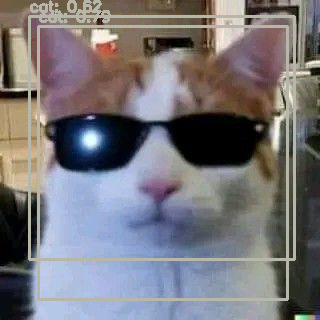

In [25]:
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            color = [int(c) for c in COLORS[class_id]]
            cv2.rectangle(result_yolo, (x, y), (x + w, y + h), color, 2)
            text = f"{LABELS[class_id]}: {confidence:.2f}"
            cv2.putText(result_yolo, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

cv2_imshow(result_yolo)
cv2.waitKey(0)
cv2.destroyAllWindows()


EXERCISE 3: SSD - SINGLE SHOT MULTIBOX DETECTOR WITH TENSOR FLOW

In [26]:
!pip install tensorflow opencv-python
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xvzf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt

--2024-10-28 10:42:21--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.142.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2024-10-28 10:42:21 (138 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x32

In [27]:
import cv2
import numpy as np
import re
import tensorflow as tf
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [28]:
def load_label_map(path):
    category_index = {}
    with open(path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if "id" in line:
                class_id = int(re.search(r'id: (\d+)', line).group(1))
            if "display_name" in line:
                label = re.search(r'display_name: "(.*)"', line).group(1)
                category_index[class_id] = label
    return category_index

label_map_path = 'mscoco_label_map.pbtxt'
LABEL_MAP = load_label_map(label_map_path)

In [36]:
ssd_model = tf.saved_model.load('ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model')

image_path = 'parkinglot.jpg'
image_np = cv2.imread(image_path)
image_height, image_width, _ = image_np.shape

input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

detections = ssd_model(input_tensor)

num_detections = int(detections['num_detections'][0])
detection_boxes = detections['detection_boxes'][0].numpy()
detection_scores = detections['detection_scores'][0].numpy()
detection_classes = detections['detection_classes'][0].numpy().astype(np.int32)


In [37]:
confidence_threshold = 0.3

COLORS = np.random.randint(0, 255, size=(len(LABEL_MAP), 3), dtype="uint8")

for i in range(num_detections):
    if detection_scores[i] > confidence_threshold:
        ymin, xmin, ymax, xmax = detection_boxes[i]
        left, right, top, bottom = (xmin * image_width, xmax * image_width,
                                    ymin * image_height, ymax * image_height)

        class_id = detection_classes[i]
        class_label = LABEL_MAP.get(class_id, 'N/A')

        color = [int(c) for c in COLORS[class_id]]
        cv2.rectangle(image_np, (int(left), int(top)), (int(right), int(bottom)), color, 2)

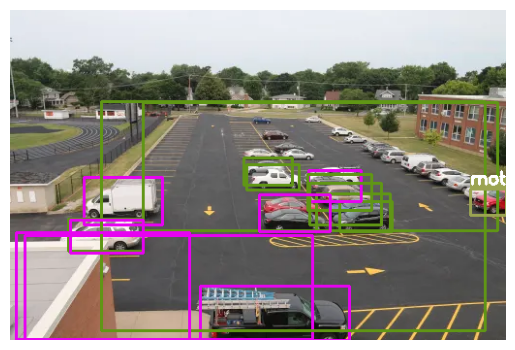

In [38]:
label = f'{class_label}: {int(detection_scores[i] * 100)}%'
label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
label_top = max(int(top) - label_size[1], 0)

cv2.rectangle(image_np, (int(left), label_top), (int(left) + label_size[0], int(top)), color, -1)
cv2.putText(image_np, label, (int(left), int(top) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

result_ssd = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

plt.imshow(result_ssd)
plt.axis('off')
plt.show()

EXERCISE 4: TRADITIONAL VS. DEEP LEARNING OBJECT DETECTION COMPARISON

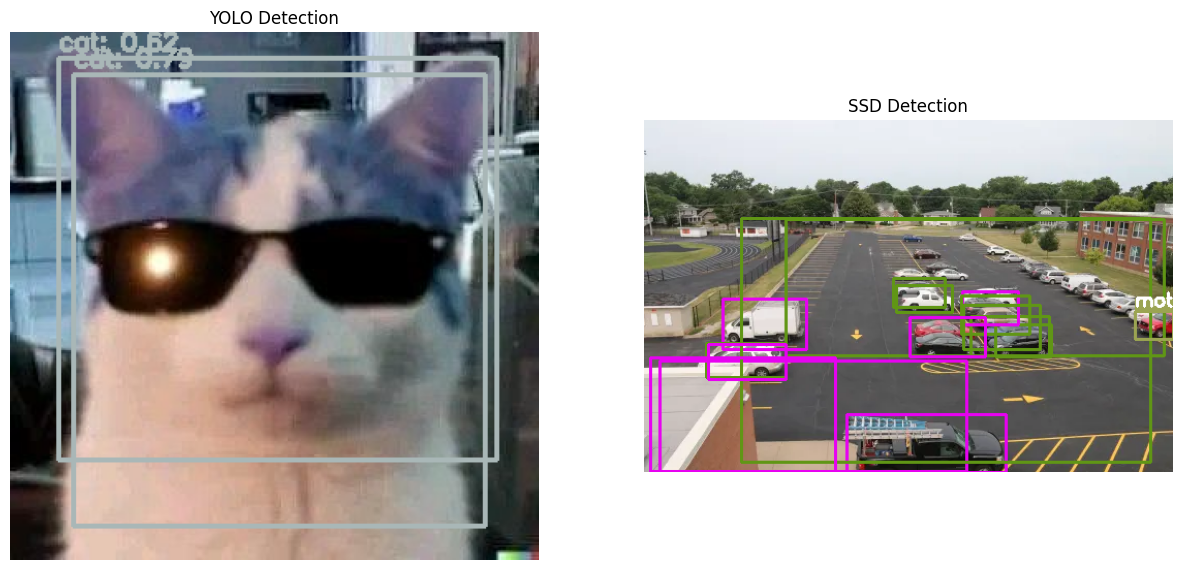

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.imshow(result_yolo)
ax1.set_title('YOLO Detection')
ax1.axis('off')

ax2.imshow(result_ssd)
ax2.set_title('SSD Detection')
ax2.axis('off')

plt.show()


In [44]:
import cv2
import numpy as np

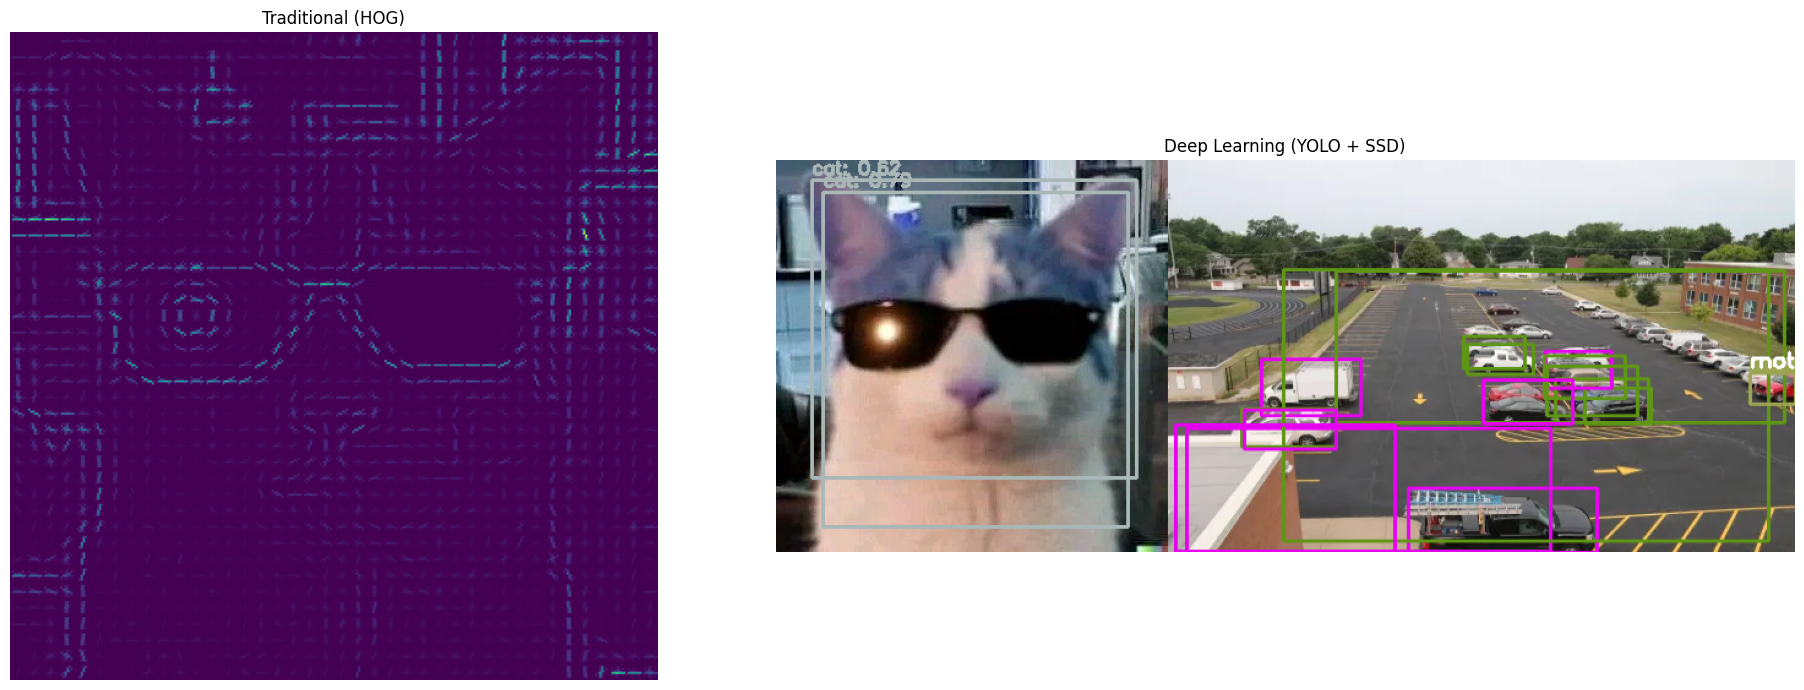

In [45]:
min_height = min(result_yolo.shape[0], result_ssd.shape[0])

result_yolo_resized = cv2.resize(result_yolo, (result_yolo.shape[1], min_height))
result_ssd_resized = cv2.resize(result_ssd, (result_ssd.shape[1], min_height))

deep_learning_result = np.concatenate((result_yolo_resized, result_ssd_resized), axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.imshow(hog_image)
ax1.set_title('Traditional (HOG)')
ax1.axis('off')

ax2.imshow(deep_learning_result)
ax2.set_title('Deep Learning (YOLO + SSD)')
ax2.axis('off')

plt.tight_layout()
plt.show()
